In [1]:
#Importar librerías
!pip install rlxutils
import os
import pandas as pd
import numpy as np
from rlxutils import subplots
import matplotlib.pyplot as plt


#Cargar los datos de Kagle
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

#Extraer Archivos
!unzip udea*.zip > /dev/null

#Cargar el Archivo train.csv
GetFileTrain = pd.read_csv("train.csv")

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11101 sha256=f05e2be5e08bf6c7a98cf4314f6df32c22c0f4182a8fbcae4425bb04dd3526e3
  Stored in directory: /root/.cache/pip/wheels/9a/45/da/49bdb0e82cc7a605e9c05dc24265687c5f349b53dcb74728e2
Successfully built rlxutils
 25% 5.00M/20.1M [00:00<00:00, 44.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 109MB/s] 


In [2]:
#Mostrar primeros 5 registros del archivo train.csv
display(GetFileTrain.head(5))

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [3]:
#Mostrar los último 5 registros del archivo train.csv
display(GetFileTrain.tail(5))

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo
692499,933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No,alto


In [4]:
#Imprimir Listado de Columnas del archivo train.csv
GetColumnsFileTrain = GetFileTrain.columns
print(GetColumnsFileTrain)
#Imprimir cantidad de Columnas
print(GetColumnsFileTrain.shape)

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')
(12,)


In [5]:
#Acceder a las columnas "ID" "ESTU_VALORMATRICULAUNIVERSIDAD" "FAMI_ESTRATOVIVIENDA" Y "RENDIMIENTO_GLOBAL"
FilterFileTrain = GetFileTrain[["ID","ESTU_VALORMATRICULAUNIVERSIDAD","FAMI_ESTRATOVIVIENDA","RENDIMIENTO_GLOBAL"]]
#Mostrar los primeros 10 registros
display(FilterFileTrain.head(10))

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,904256,Entre 5.5 millones y menos de 7 millones,Estrato 3,medio-alto
1,645256,Entre 2.5 millones y menos de 4 millones,Estrato 3,bajo
2,308367,Entre 2.5 millones y menos de 4 millones,Estrato 3,bajo
3,470353,Entre 4 millones y menos de 5.5 millones,Estrato 4,alto
4,989032,Entre 2.5 millones y menos de 4 millones,Estrato 3,medio-bajo
5,659872,Más de 7 millones,Estrato 5,medio-alto
6,47159,Entre 2.5 millones y menos de 4 millones,Estrato 2,alto
7,11829,Entre 1 millón y menos de 2.5 millones,Estrato 2,medio-bajo
8,257869,Entre 5.5 millones y menos de 7 millones,Estrato 1,medio-bajo
9,465511,Entre 2.5 millones y menos de 4 millones,Estrato 5,alto


Axes(0.125,0.11;0.775x0.77)


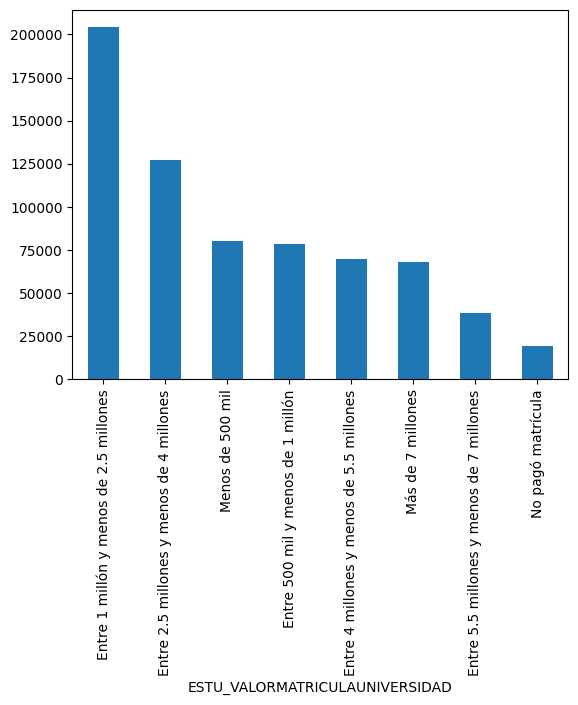

In [6]:
#Imprimir histograma Valor Matricula
FilterFileTrain = GetFileTrain.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')
print(FilterFileTrain)

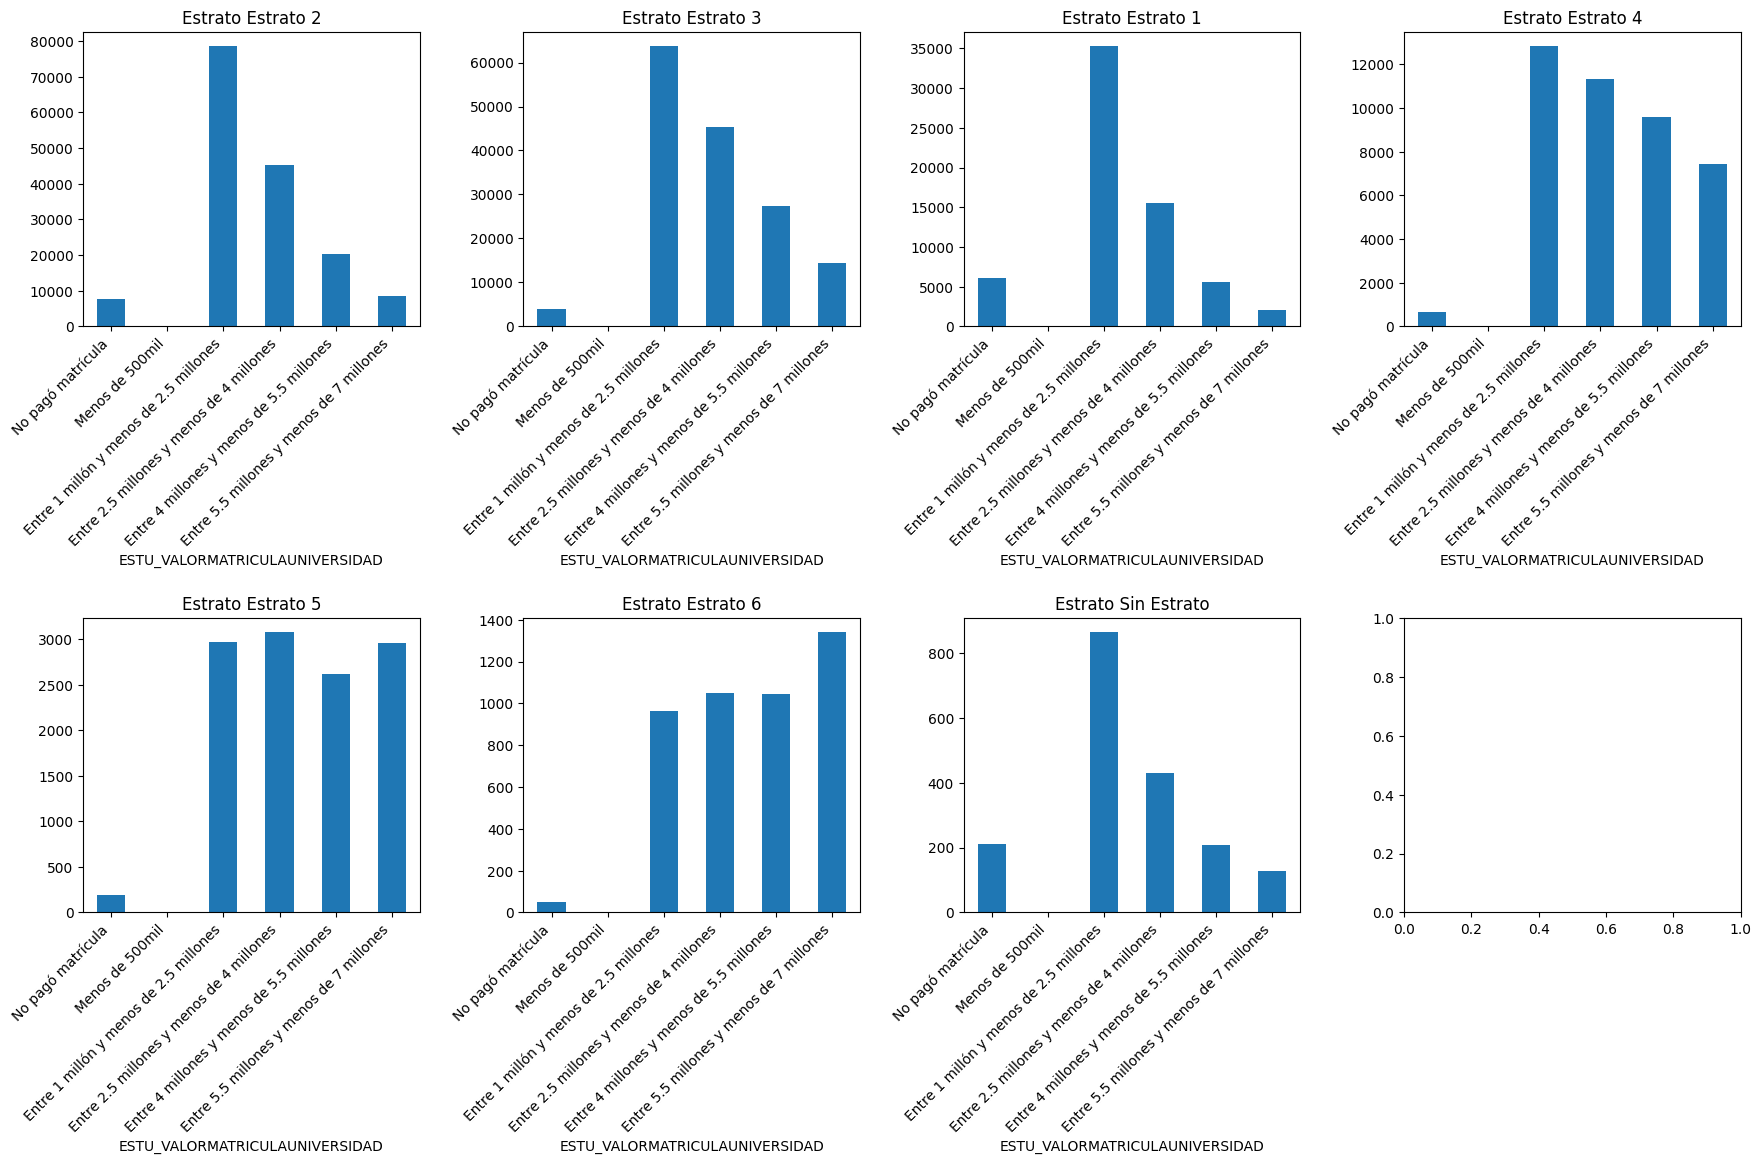

In [17]:
#VALOR MATRICULA PAGADO VS ESTRATO
import matplotlib.pyplot as plt
import math

#Obtener valores de FAMI_ESTRATOVIVIENDA
GetColumnFileTrain = GetFileTrain.FAMI_ESTRATOVIVIENDA.value_counts().index

#Crear los subplots
fig, axes = plt.subplots(nrows=math.ceil(len(GetColumnFileTrain) / 4), ncols=4, figsize=(18, 12))

#Lista de valores esperados
valores = ['No pagó matrícula', 'Menos de 500mil', 'Entre 1 millón y menos de 2.5 millones',
           'Entre 2.5 millones y menos de 4 millones', 'Entre 4 millones y menos de 5.5 millones',
           'Entre 5.5 millones y menos de 7 millones']

#Bucle para cada valor de FAMI_ESTRATOVIVIENDA
for ax, ejey in zip(axes.flatten(), GetColumnFileTrain):
    Data = GetFileTrain[GetFileTrain.FAMI_ESTRATOVIVIENDA == ejey]

    #Manejar valores faltantes
    Data.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().reindex(valores).fillna(0).plot(kind='bar', ax=ax)

    #Titulo Graf
    ax.set_title(f'Estrato {ejey}', fontsize=12)

    #Rotar etiquetas del eje X
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    #Aumentar tamaño de las etiquetas del eje Y
    ax.tick_params(axis='y', labelsize=10)

# Ajustar el layout
plt.tight_layout(pad=2.0)

#Imprimir
plt.show()

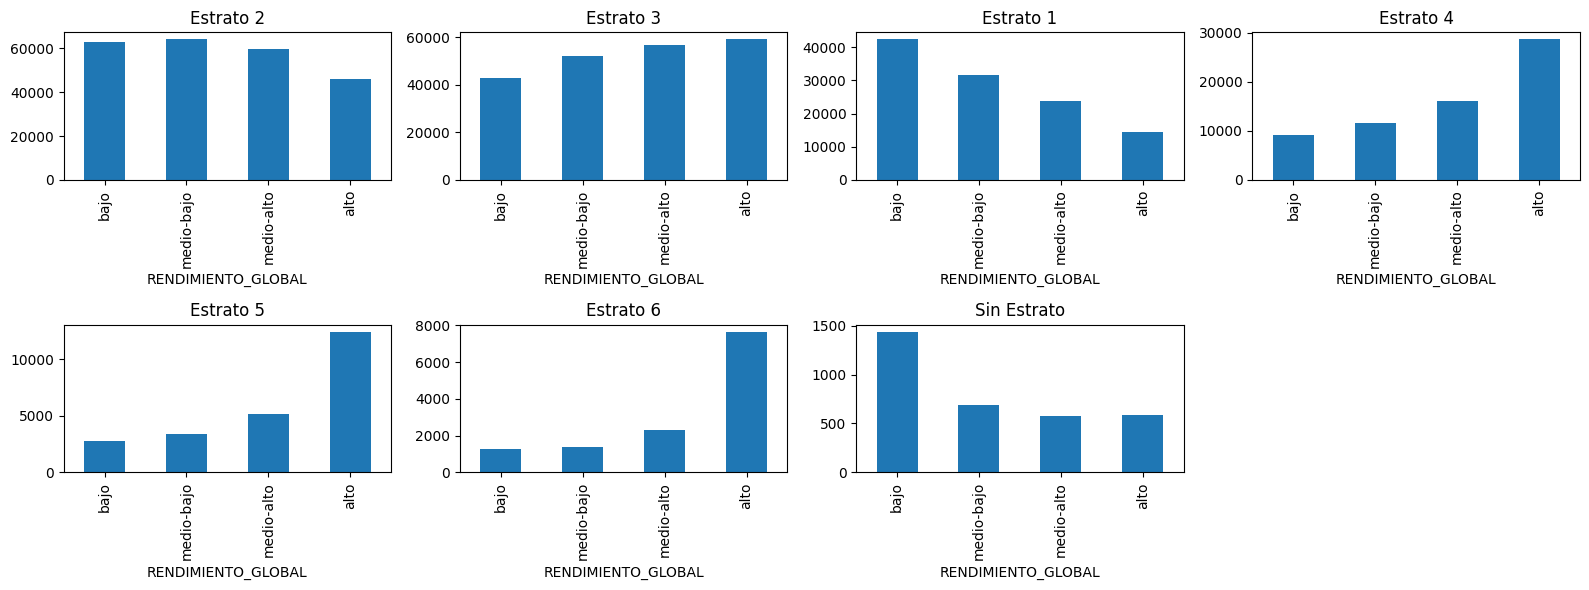

In [19]:
#RENDIMIENTO VS ESTRATO
GetColumnFileTrain = GetFileTrain.FAMI_ESTRATOVIVIENDA.value_counts().index
#Crear Gráficos
for ejex, ejey in subplots(GetColumnFileTrain, n_cols=4, usizex=4):
      Data = GetFileTrain[GetFileTrain.FAMI_ESTRATOVIVIENDA==ejey]
      Data.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')

      plt.title(ejey)